# Importation des packages

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [140]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [141]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')

# Etude du jeu de données

Utilisation de ce guide: https://www.kaggle.com/code/sbongo/for-beginners-tackling-toxic-using-keras

In [142]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = data[list_classes].values
list_sentences_train = data["comment_text"]

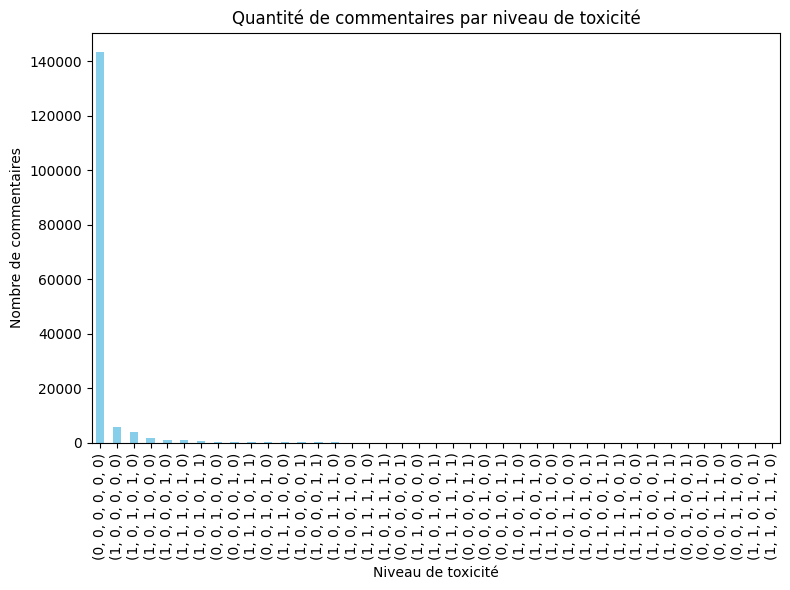

In [143]:
# Calculer le nombre de commentaires pour chaque niveau de toxicité
toxicite_counts = data[list_classes].value_counts()

# Créer le barplot
plt.figure(figsize=(8, 6))
toxicite_counts.plot(kind='bar', color='skyblue')

# Ajouter des titres et libellés
plt.title('Quantité de commentaires par niveau de toxicité')
plt.xlabel('Niveau de toxicité')
plt.ylabel('Nombre de commentaires')

# Afficher le barplot
plt.tight_layout()
plt.show()

# Préparation des données

In [144]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(list_sentences_train, data[list_classes], test_size=0.2, random_state=42)

In [145]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Entraînement du modèle baseline

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Build CNN model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(6, activation='sigmoid'))

In [162]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          18319800  
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_9 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 6)                 774       
                                                                 
Total params: 18384702 (70.13 MB)
Trainable params: 18384702 (70.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [163]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [164]:
# Train model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
3591/3591 [==============================] - 868s 241ms/step - loss: 0.0663 - accuracy: 0.9411 - val_loss: 0.0562 - val_accuracy: 0.7811
Epoch 2/3
3591/3591 [==============================] - 868s 242ms/step - loss: 0.0476 - accuracy: 0.8854 - val_loss: 0.0559 - val_accuracy: 0.9610
Epoch 3/3
3591/3591 [==============================] - 879s 245ms/step - loss: 0.0395 - accuracy: 0.7762 - val_loss: 0.0568 - val_accuracy: 0.5332


Plus le nombre d'epochs est important, plus l'accuracy diminue.
On obtient une accuracy supérieur à 0.90 en premier lieu avant que cela ne baisse

In [165]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

998/998 [==============================] - 6s 6ms/step - loss: 0.0550 - accuracy: 0.5325
Accuracy: 0.5324769020080566


# Itération de la modélisation

In [166]:
# Check the keys available in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [167]:
# print accuracy & val_accuracy
print(history.history['accuracy'])
print(history.history['val_accuracy'])

# print loss & val_loss
print(history.history['loss'])
print(history.history['val_loss'])

[0.9411175847053528, 0.885386049747467, 0.7762207388877869]
[0.7811374068260193, 0.9609901309013367, 0.533213198184967]
[0.06625227630138397, 0.04758048802614212, 0.03951738402247429]
[0.05621322616934776, 0.05585114657878876, 0.0567975789308548]


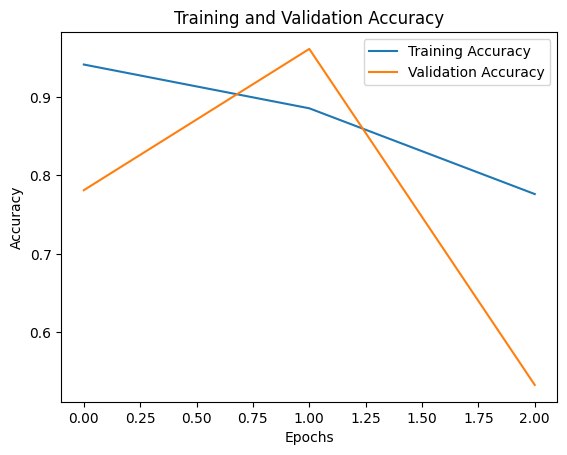

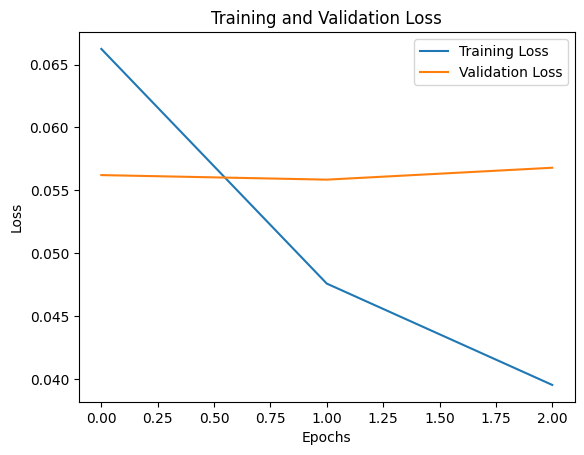

In [168]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()